In [1]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

import re
import seaborn as sns

import mglearn

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import warnings

import urllib
import zipfile
from pathlib import Path
from datetime import datetime, timedelta

import math

warnings.filterwarnings('ignore')

pd.options.display.precision = 2

In [2]:
file = r'C:\Users\groov\PythonCode\data\SeattleRain\SeattleRain.csv'
df = pd.read_csv(file) # quietly skip the many bad rows
df['class'] = df['RAIN'].astype(bool).astype(int)

df['month'] = pd.to_numeric(df['DATE'].str[5:7])
df['day'] = pd.to_numeric(df['DATE'].str[8:10])

df['TMEAN'] = (df['TMAX'] + df['TMIN']) / 2

# feature engineering
days_to_keep = 31

for day in range(1, days_to_keep+1):
    var_name = 'prev' + str(day) + '_class'
    df[var_name] = df['class'].shift(day)
    
for day in range(1, days_to_keep+1):
    var_name = 'prev' + str(day) + '_TMAX'
    df[var_name] = df['TMAX'].shift(day)
    
for day in range(1, days_to_keep+1):
    var_name = 'prev' + str(day) + '_TMIN'
    df[var_name] = df['TMIN'].shift(day)

# drop no longer needed columns
df.drop('RAIN', axis=1, inplace=True)
df.drop('DATE', axis=1, inplace=True)
df.drop('PRCP', axis=1, inplace=True)

df.dropna(how='any', inplace=True) # let's replace with mean

df.head(5)

,TMAX,TMIN,class,month,day,TMEAN,prev1_class,prev2_class,prev3_class,prev4_class,...,prev22_TMIN,prev23_TMIN,prev24_TMIN,prev25_TMIN,prev26_TMIN,prev27_TMIN,prev28_TMIN,prev29_TMIN,prev30_TMIN,prev31_TMIN
31,39,30,1,2,1,34.5,1.0,1.0,1.0,0.0,...,34.0,31.0,35.0,40.0,39.0,32.0,34.0,35.0,36.0,42.0
32,43,26,0,2,2,34.5,1.0,1.0,1.0,1.0,...,32.0,34.0,31.0,35.0,40.0,39.0,32.0,34.0,35.0,36.0
33,38,26,1,2,3,32.0,0.0,1.0,1.0,1.0,...,26.0,32.0,34.0,31.0,35.0,40.0,39.0,32.0,34.0,35.0
34,39,31,1,2,4,35.0,1.0,0.0,1.0,1.0,...,29.0,26.0,32.0,34.0,31.0,35.0,40.0,39.0,32.0,34.0
35,36,26,0,2,5,31.0,1.0,1.0,0.0,1.0,...,26.0,29.0,26.0,32.0,34.0,31.0,35.0,40.0,39.0,32.0


In [3]:
clean_df = df.copy()

y = clean_df['class']

clean_df.drop('class', axis=1, inplace=True)


X = clean_df

In [4]:
print("X: {}, Y: {}".format(X.shape, y.shape))

X: (25520, 98), Y: (25520,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)
X_train.head()

,TMAX,TMIN,month,day,TMEAN,prev1_class,prev2_class,prev3_class,prev4_class,prev5_class,...,prev22_TMIN,prev23_TMIN,prev24_TMIN,prev25_TMIN,prev26_TMIN,prev27_TMIN,prev28_TMIN,prev29_TMIN,prev30_TMIN,prev31_TMIN
5713,66,56,8,23,61.0,1.0,0.0,0.0,0.0,1.0,...,51.0,53.0,53.0,51.0,54.0,54.0,52.0,54.0,55.0,47.0
16663,69,58,8,15,63.5,0.0,0.0,0.0,0.0,0.0,...,56.0,57.0,57.0,55.0,55.0,55.0,51.0,53.0,56.0,54.0
3693,52,39,2,10,45.5,1.0,1.0,1.0,1.0,1.0,...,29.0,33.0,41.0,46.0,47.0,41.0,38.0,41.0,43.0,43.0
11075,56,48,4,28,52.0,1.0,1.0,0.0,0.0,0.0,...,33.0,40.0,43.0,43.0,41.0,44.0,38.0,45.0,46.0,46.0
18701,44,37,3,15,40.5,1.0,1.0,1.0,0.0,0.0,...,41.0,32.0,38.0,37.0,37.0,42.0,33.0,34.0,37.0,44.0


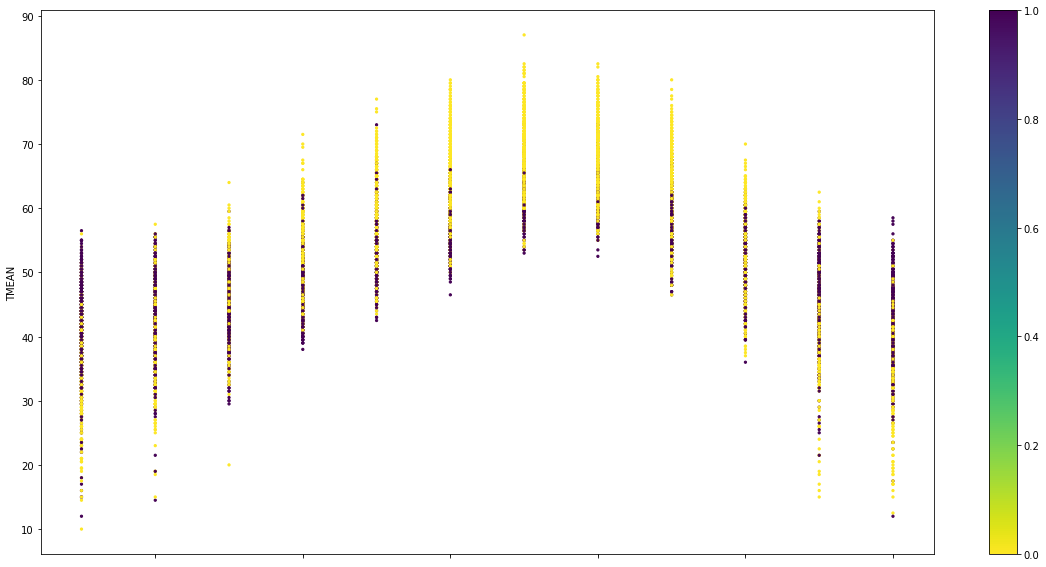

In [6]:
cmap = cm.get_cmap('viridis_r')
X_train.plot.scatter('month', 'TMEAN', s=5, c=y_train, cmap=cmap, figsize=(20,10))

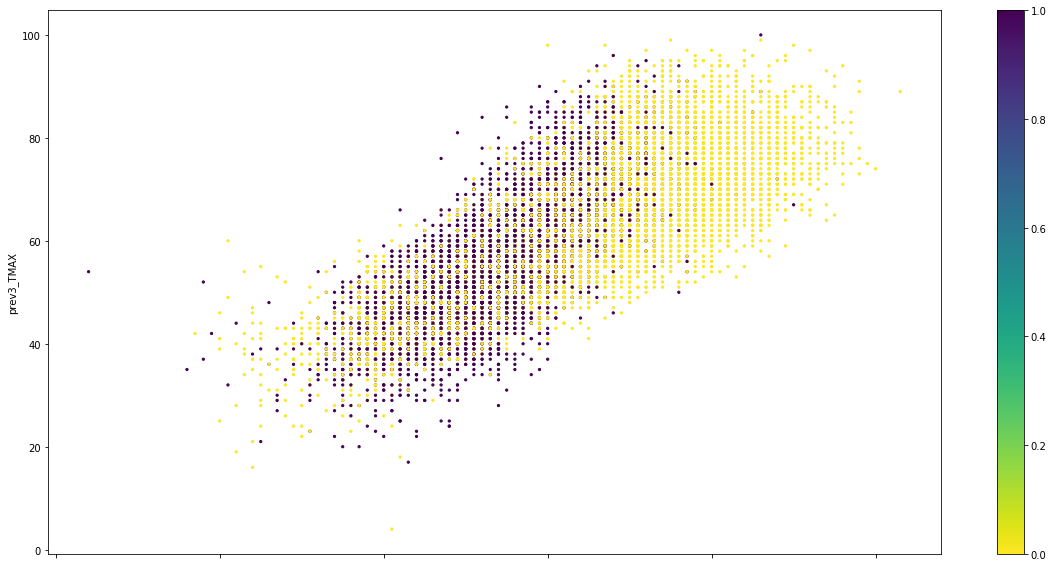

In [7]:
cmap = cm.get_cmap('viridis_r')
X_train.plot.scatter('TMAX', 'prev3_TMAX', s=5, c=y_train, cmap=cmap, figsize=(20,10))

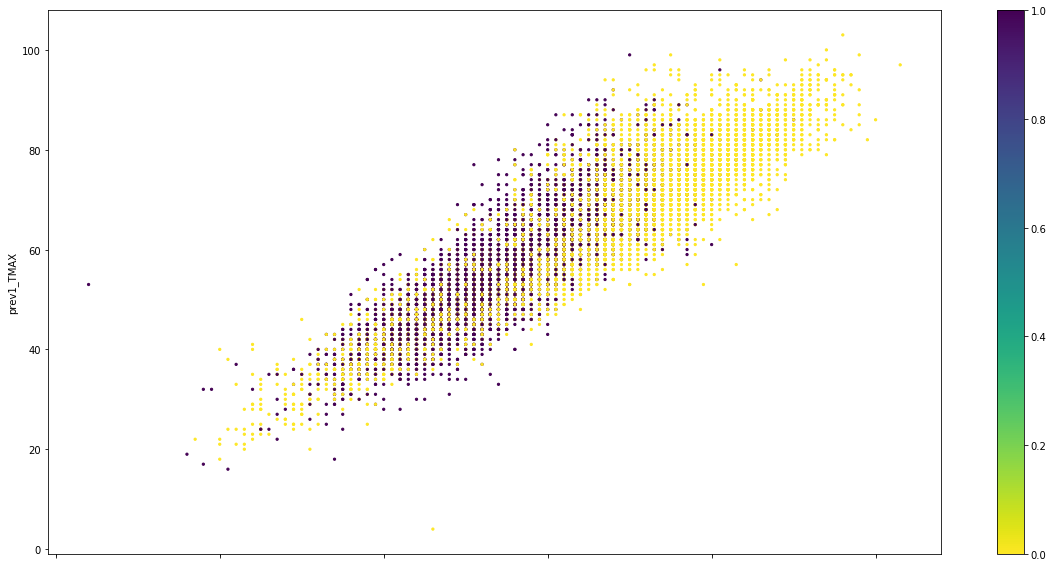

In [8]:
cmap = cm.get_cmap('viridis_r')
X_train.plot.scatter('TMAX', 'prev1_TMAX', s=5, c=y_train, cmap=cmap, figsize=(20,10))

In [9]:
def plot_feature_importances(clf, columns):
    n_features = X.shape[1]
    height = n_features * 0.3
    width = height * 1.2
    plt.figure(figsize=(width,height))
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.7663


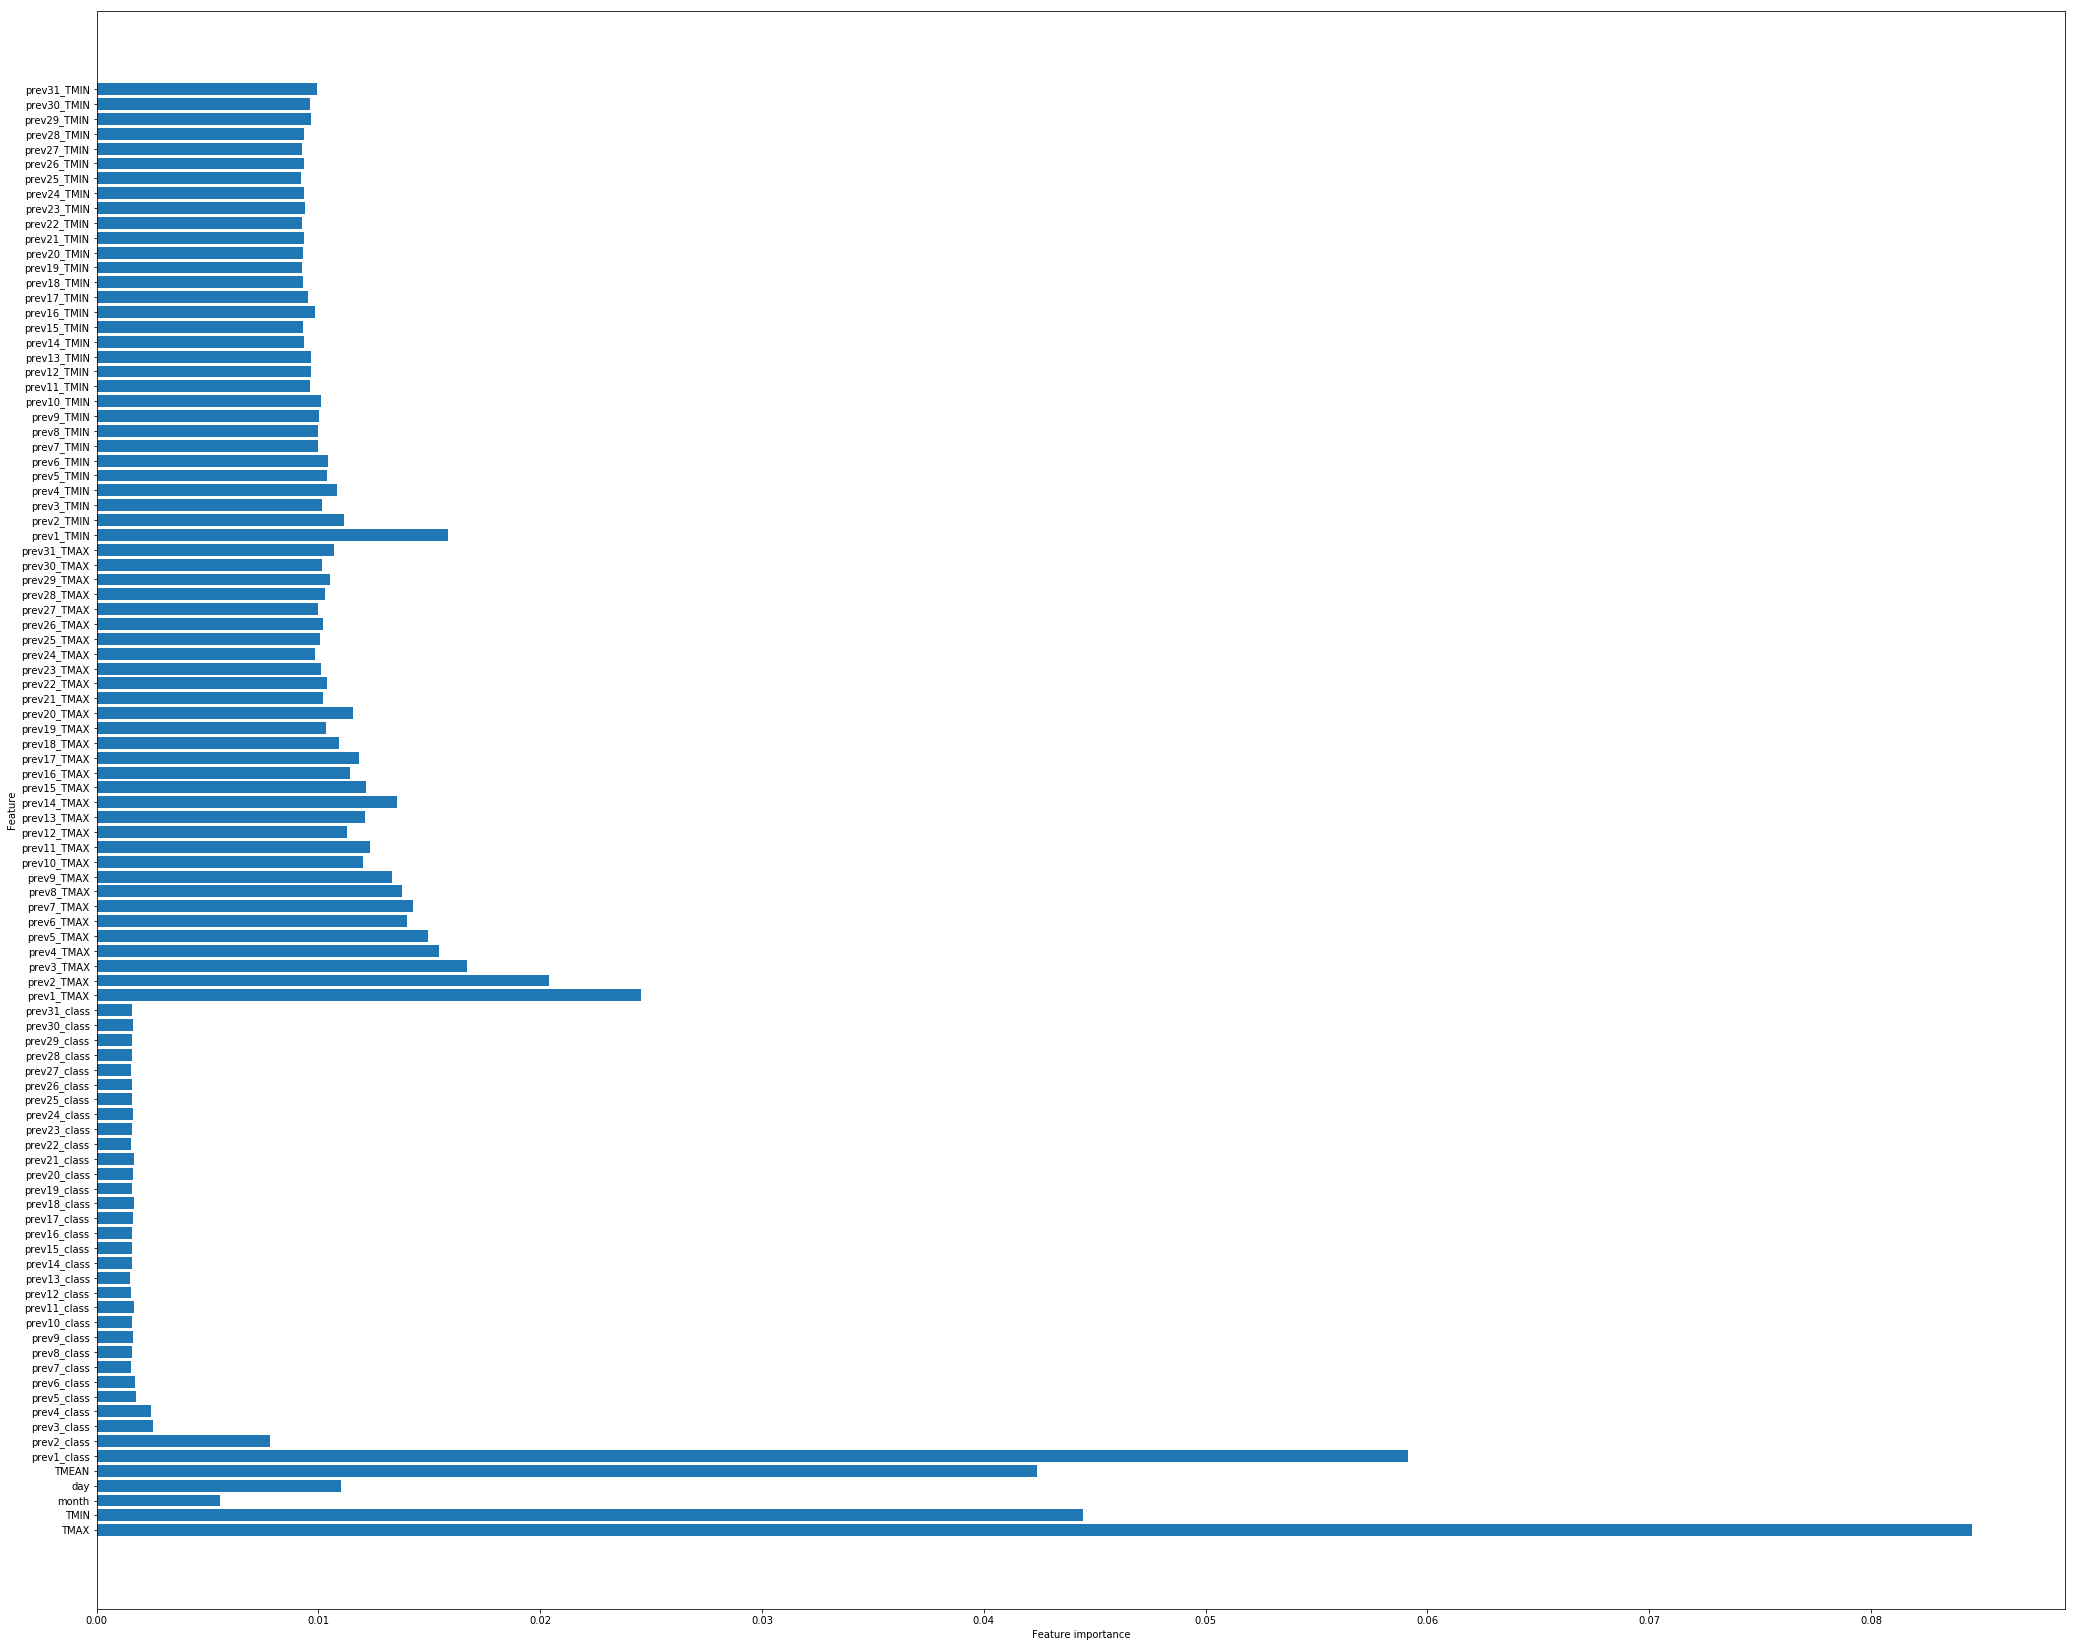

In [11]:
columns = X_train.columns
plot_feature_importances(forest, columns)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

#clf = GradientBoostingClassifier(max_features=7, max_depth=10, learning_rate=0.1, n_estimators=500)
#clf.fit(X_train, y_train)

#print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
#print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

In [13]:
from sklearn import neighbors, datasets
n_neighbors = 20 #optimized value

#clf = neighbors.KNeighborsClassifier(n_neighbors)
#clf.fit(X_train, y_train)

#print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

In [14]:
from sklearn.svm import SVC
#svm = SVC(random_state=0, gamma=0.01, C=1)
#svm.fit(X_train, y_train)

#print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

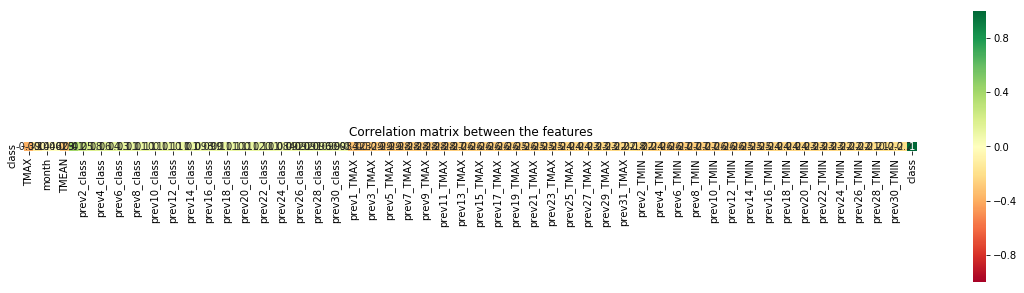

In [15]:
correlation_matrix = clean_df.join(y).corr()[-1:]
plt.figure(figsize=(20,5))
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.show()

In [16]:
# onehotencoding would make correlation more effective
# then, let's cut out the features that aren't helpful
# then let's simplify the model to only use features that matter

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.7663


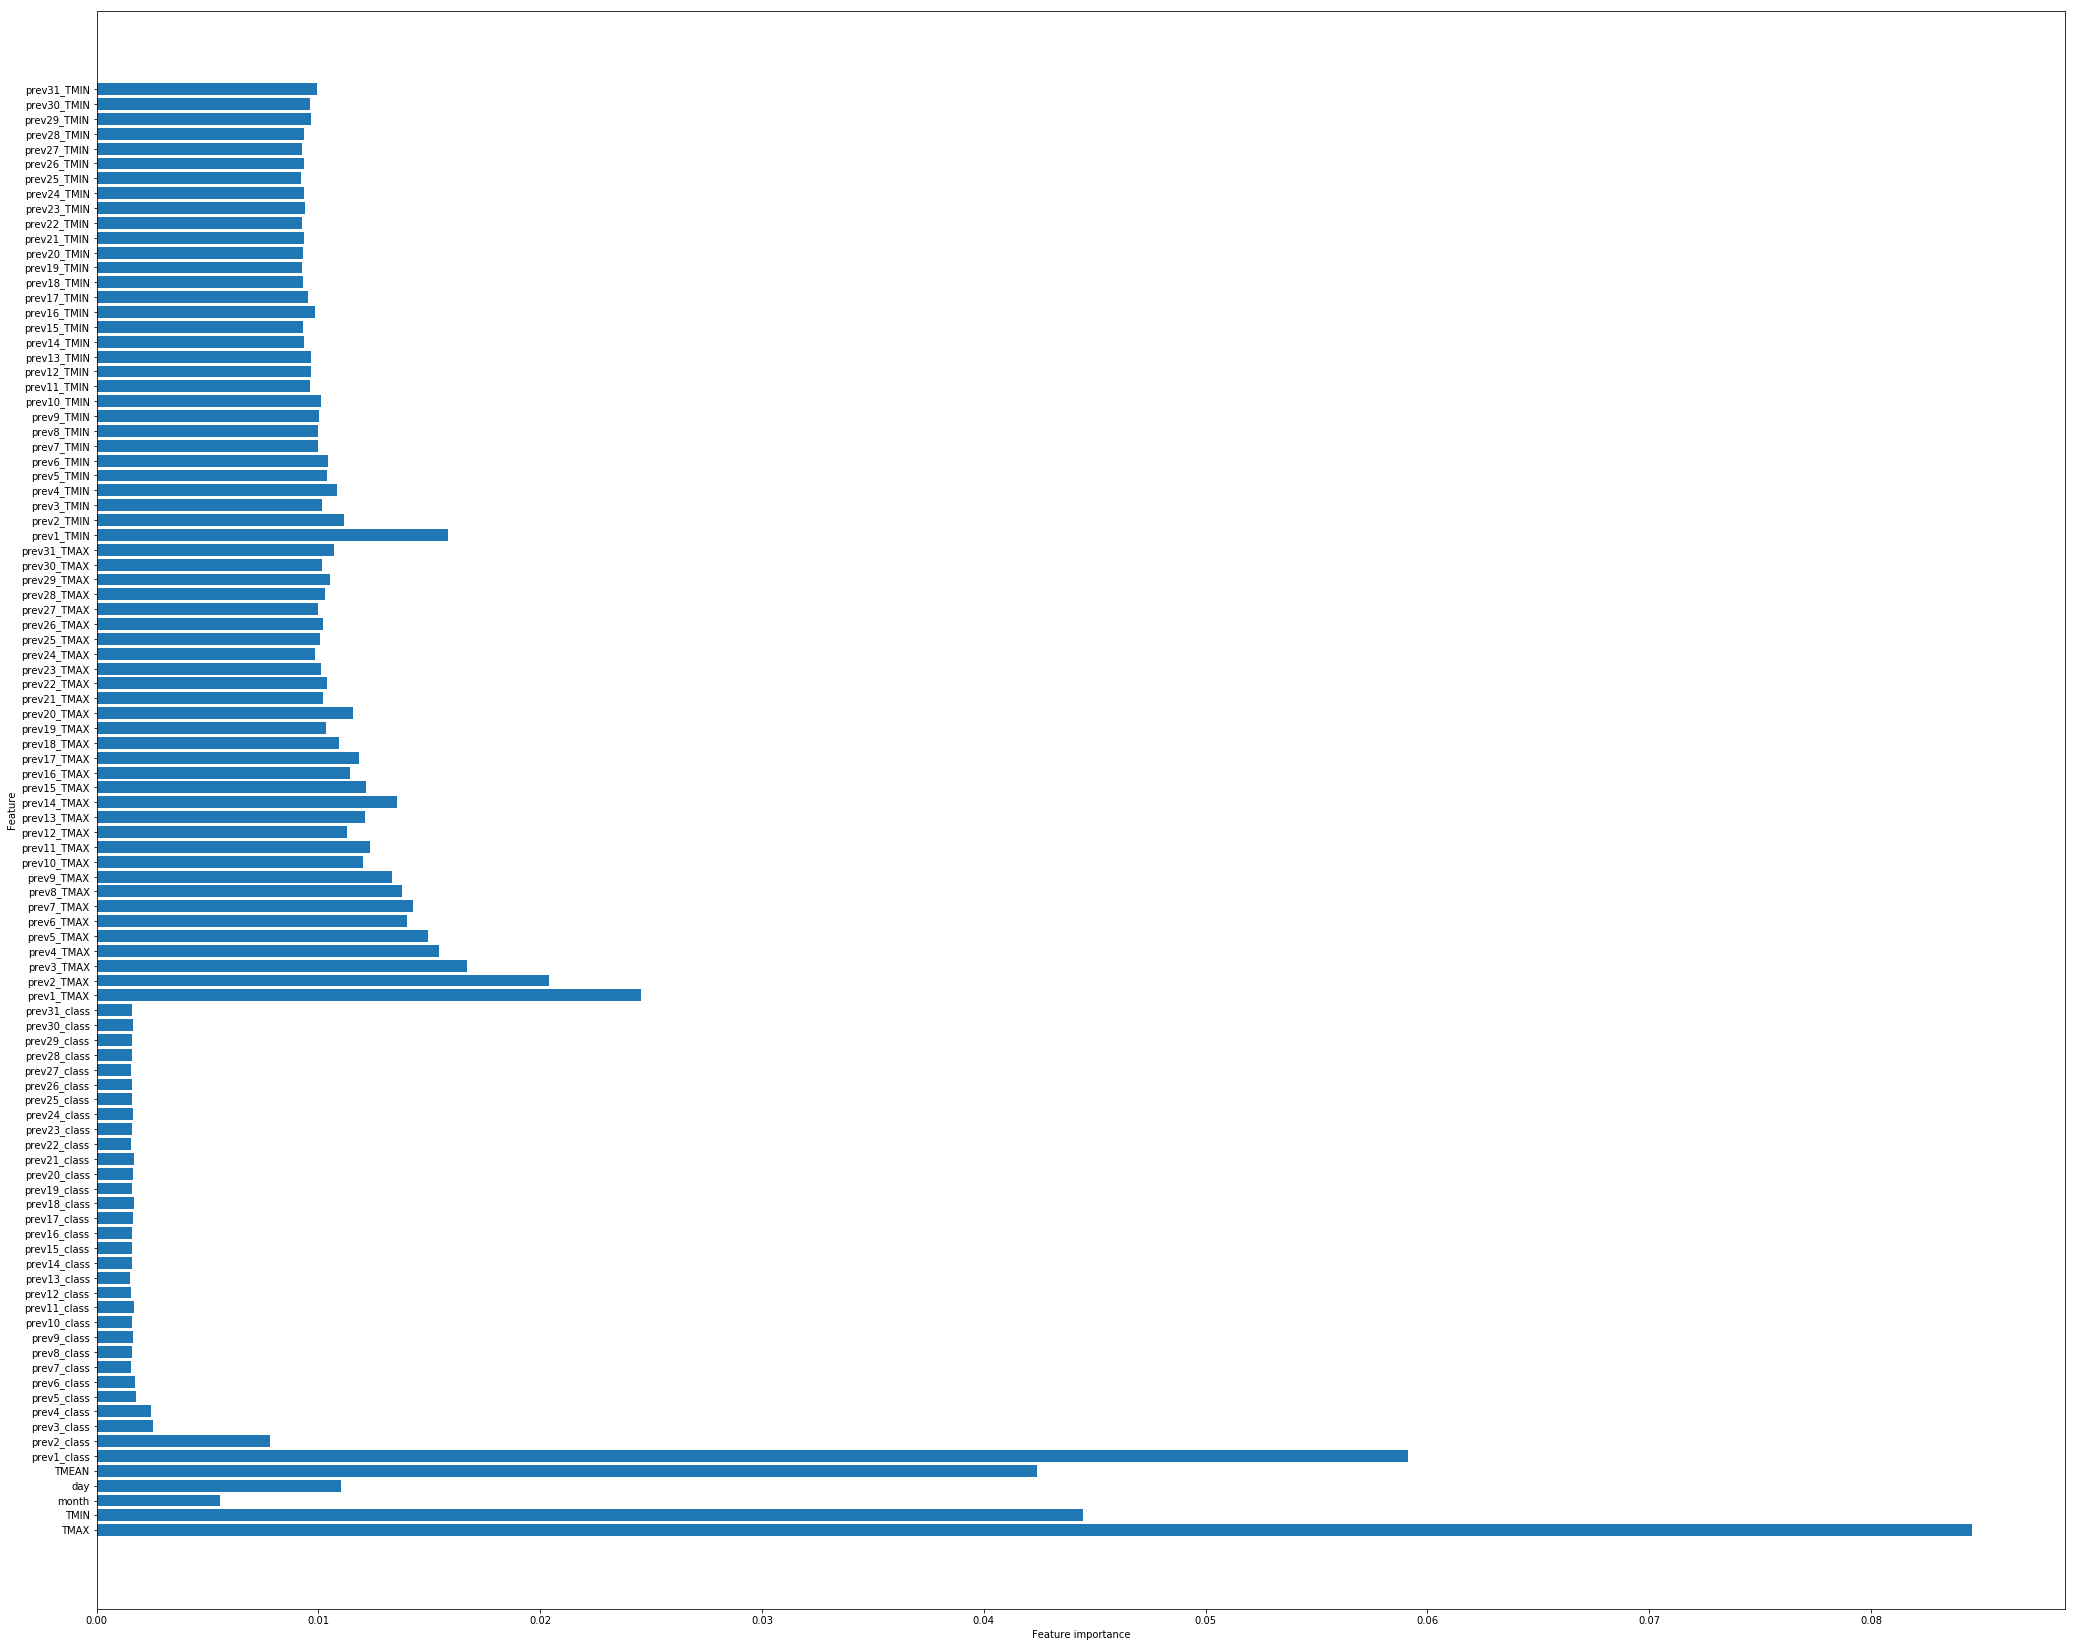

In [18]:
columns = X_train.columns
plot_feature_importances(forest, columns)

In [19]:
# drop weak predictors

importance = pd.DataFrame({'cols': clean_df.columns.values, 'value':forest.feature_importances_})
importance.sort_values(by='value', ascending=False, inplace=True)

threshold = 25
for feature in importance[threshold:]['cols']:
    clean_df.drop(feature, axis=1, inplace=True)
    
X = clean_df

In [20]:
print("X: {}, Y: {}".format(X.shape, y.shape))

X: (25520, 25), Y: (25520,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)
X_train.head()

,TMAX,TMIN,day,TMEAN,prev1_class,prev1_TMAX,prev2_TMAX,prev3_TMAX,prev4_TMAX,prev5_TMAX,...,prev11_TMAX,prev12_TMAX,prev13_TMAX,prev14_TMAX,prev15_TMAX,prev16_TMAX,prev17_TMAX,prev20_TMAX,prev1_TMIN,prev2_TMIN
5713,66,56,23,61.0,1.0,72.0,72.0,71.0,70.0,72.0,...,80.0,76.0,80.0,73.0,85.0,79.0,73.0,82.0,55.0,56.0
16663,69,58,15,63.5,0.0,63.0,65.0,70.0,75.0,74.0,...,95.0,89.0,85.0,81.0,78.0,73.0,67.0,74.0,56.0,56.0
3693,52,39,10,45.5,1.0,49.0,52.0,56.0,53.0,52.0,...,46.0,52.0,52.0,49.0,54.0,51.0,49.0,45.0,44.0,44.0
11075,56,48,28,52.0,1.0,56.0,56.0,64.0,70.0,58.0,...,54.0,50.0,61.0,50.0,53.0,57.0,57.0,59.0,49.0,50.0
18701,44,37,15,40.5,1.0,50.0,54.0,47.0,52.0,50.0,...,45.0,47.0,48.0,45.0,50.0,50.0,47.0,48.0,41.0,45.0


In [22]:
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.7774


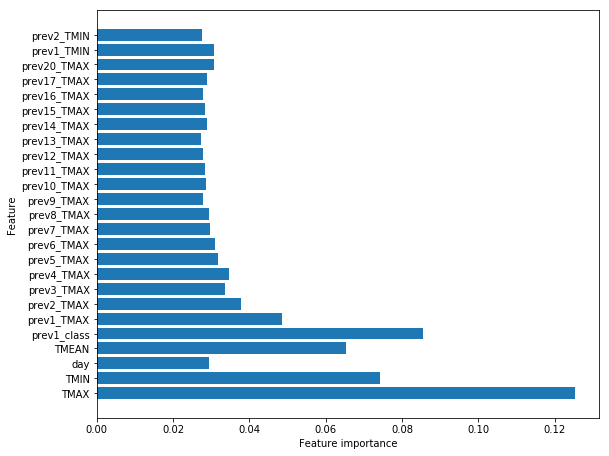

In [23]:
columns = X_train.columns
plot_feature_importances(forest, columns)

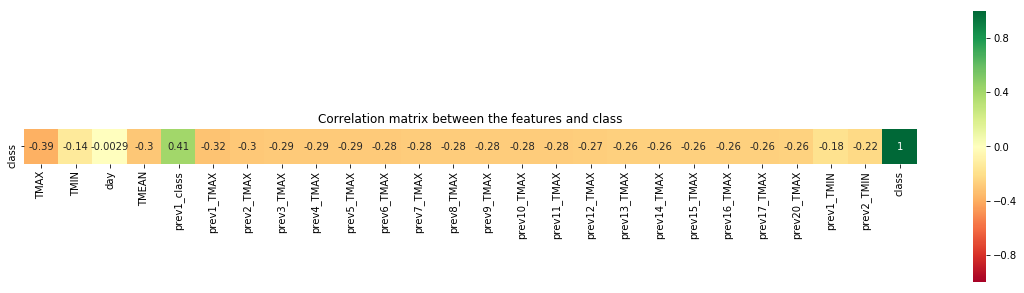

In [24]:
# much cleaner way to show a correlation heat map for class
correlation_matrix = clean_df.join(y).corr()[-1:]
plt.figure(figsize=(20,5))
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features and class')
plt.show()

In [25]:
mf = pd.Series()
md = pd.Series()
score = pd.Series()

i=0

for max_features in range(4, 6):
    for max_depth in range(10, 13):
        
        forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=max_features, max_depth=max_depth)
        forest.fit(X_train, y_train)
        
        mf = mf.set_value(i, max_features)
        md = md.set_value(i, max_depth)
        score = score.set_value(i, forest.score(X_test, y_test))
        
        i += 1

        #print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
        #print("Test Accuracy: {:.4f} (f:{}, d:{})".format(forest.score(X_test, y_test), max_features, max_depth))
        
diag_df = pd.DataFrame({'mf':mf, 'md':md, 'score':score})
diag_df.set_index(['mf', 'md'], inplace=True)
diag_df

score
mf md       
4  5    0.74
   6    0.75
   7    0.75
   8    0.76
   9    0.77
   10   0.77
   11   0.77
   12   0.77
   13   0.77
   14   0.77
5  5    0.74
   6    0.75
   7    0.76
   8    0.77
   9    0.77
   10   0.77
   11   0.77
   12   0.78
   13   0.78
   14   0.78
6  5    0.75
   6    0.76
   7    0.77
   8    0.77
   9    0.77
   10   0.77
   11   0.78
   12   0.78
   13   0.78
   14   0.78

In [53]:
diag_df.sort_values(by='score', ascending=False).head()

score
mf md       
6  13   0.78
5  13   0.78
6  12   0.78
   11   0.78
   14   0.78

In [58]:
# optimized RF
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=6, max_depth=13)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.78


In [59]:
from sklearn.metrics import classification_report

predictions = forest.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.82      0.79      0.80      3682
          1       0.73      0.76      0.74      2698

avg / total       0.78      0.78      0.78      6380



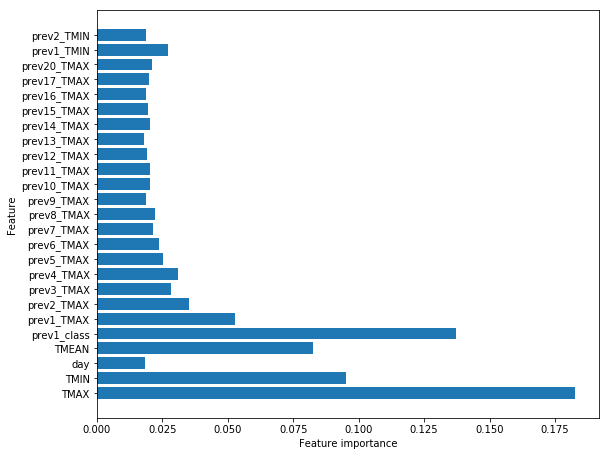

In [28]:
# these are the final importances after tuning RF
columns = X_train.columns
plot_feature_importances(forest, columns)

In [56]:
# optimized GB

clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_features=6, max_depth=13)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.77


In [57]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.81      0.80      0.80      3682
          1       0.73      0.74      0.73      2698

avg / total       0.77      0.77      0.77      6380



In [41]:
# optimized knn

n_neighbors = 20

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.74
Accuracy on test set: 0.713


In [42]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.73      0.79      0.76      3682
          1       0.68      0.60      0.64      2698

avg / total       0.71      0.71      0.71      6380



In [39]:
svm = SVC(random_state=0, gamma=0.01, C=100)
svm.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.662


In [40]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.71      0.73      0.72      3682
          1       0.62      0.60      0.61      2698

avg / total       0.67      0.67      0.67      6380



In [32]:
#cmap = cm.get_cmap('viridis')
#grr = pd.scatter_matrix(X_train, figsize=(25, 25), marker='.', s=5, c=y_train, alpha=.8, cmap=cmap)